In [43]:
# DQN Model Performance Visualization and Regression Analysis

## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

## Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Read data
df = pd.read_csv('model_test_results_20250417_014422_summary.csv')

# Display the first few rows of the data
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

print("\nDataset statistical summary:")
print(df.describe())

## Extract training steps from model names
df['Steps'] = df['Model'].str.extract(r'pig_chase-dqn_fast_(\d+)\.model').astype(int)

# Sort data by steps
df = df.sort_values('Steps')

print("\nFirst 5 rows after adding steps column:")
print(df.head())

## Data Visualization

# Create a function for regression analysis and visualization
def plot_regression(x_col, y_col, title, xlabel, ylabel, order=2):
    plt.figure(figsize=(12, 8))
    
    # Scatter plot
    plt.scatter(df[x_col], df[y_col], s=100, color='blue', alpha=0.7)
    
    # Polynomial regression
    X = df[x_col].values.reshape(-1, 1)
    y_data = df[y_col].values
    
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=order, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X, y_data)
    
    # Generate X values for prediction
    X_seq = np.linspace(df[x_col].min(), df[x_col].max(), 100).reshape(-1, 1)
    y_pred = pipeline.predict(X_seq)
    
    # Plot regression line
    plt.plot(X_seq, y_pred, color='red', linewidth=2, label=f'Order {order} Polynomial Regression')
    
    # Calculate R² value
    y_pred_data = pipeline.predict(X)
    r2 = r2_score(y_data, y_pred_data)
    rmse = np.sqrt(mean_squared_error(y_data, y_pred_data))
    
    plt.title(f'{title}\nR² = {r2:.4f}, RMSE = {rmse:.4f}', fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add trend annotation
    direction = "Increasing" if np.polyfit(df[x_col], df[y_col], 1)[0] > 0 else "Decreasing"
    plt.annotate(f'Overall trend: {direction}', xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    return plt


First 5 rows of the dataset:
                            Model  Episodes_Completed  Avg_Reward  Max_Reward  \
0   pig_chase-dqn_fast_5000.model                  50      -19.92         4.0   
1  pig_chase-dqn_fast_10000.model                  50      -19.38        -1.0   
2  pig_chase-dqn_fast_20000.model                  50      -18.26        16.0   
3  pig_chase-dqn_fast_30000.model                  50      -19.48         9.0   
4  pig_chase-dqn_fast_40000.model                  50      -21.00        10.0   

   Min_Reward  
0       -25.0  
1       -25.0  
2       -25.0  
3       -25.0  
4       -25.0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               31 non-null     object 
 1   Episodes_Completed  31 non-null     int64  
 2   Avg_Reward          31 non-null     float64
 3   Max_Reward    

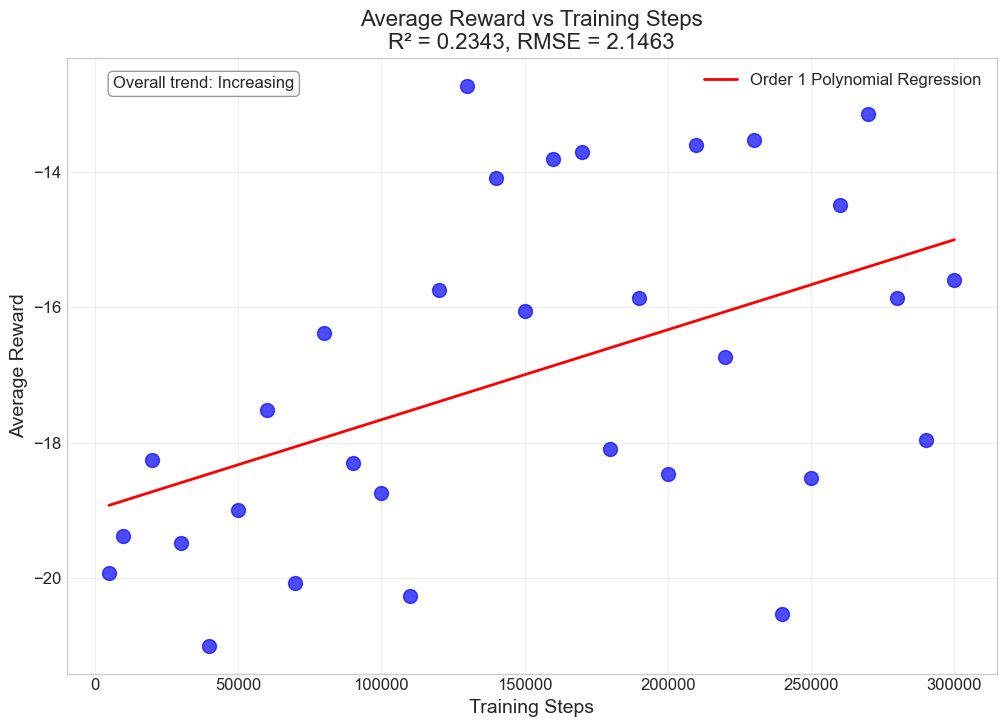

In [44]:
# 1. 平均奖励随步数的变化
plt_avg = plot_regression('Steps', 'Avg_Reward', 'Average Reward vs Training Steps', 'Training Steps', 'Average Reward', order=1)
plt_avg.savefig('avg_reward_vs_steps.png', dpi=300, bbox_inches='tight')
plt_avg.show()


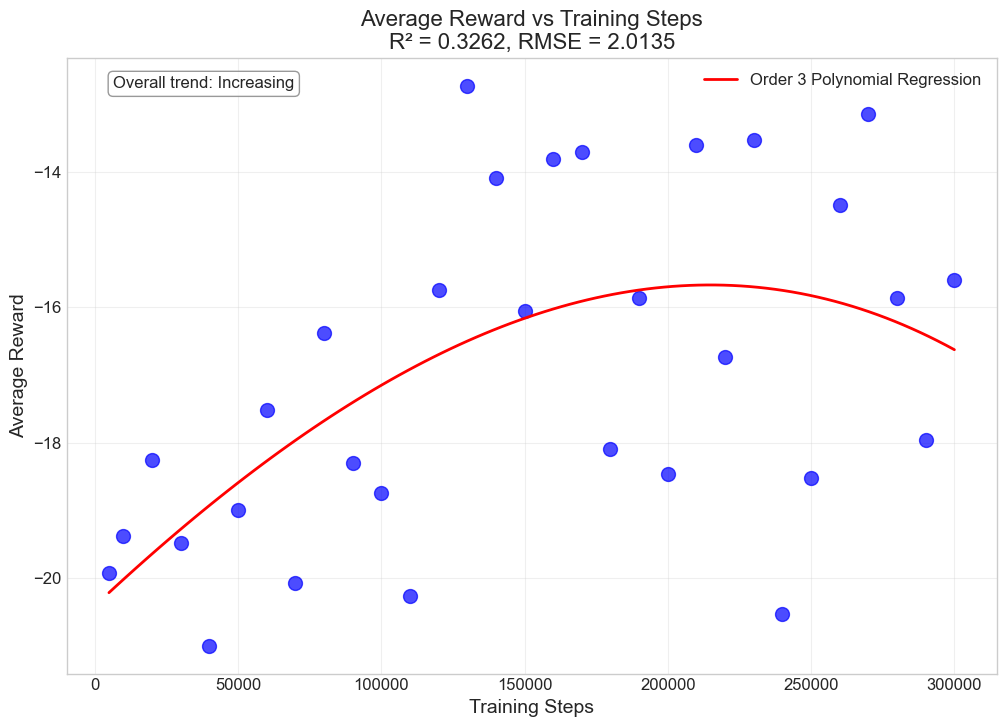

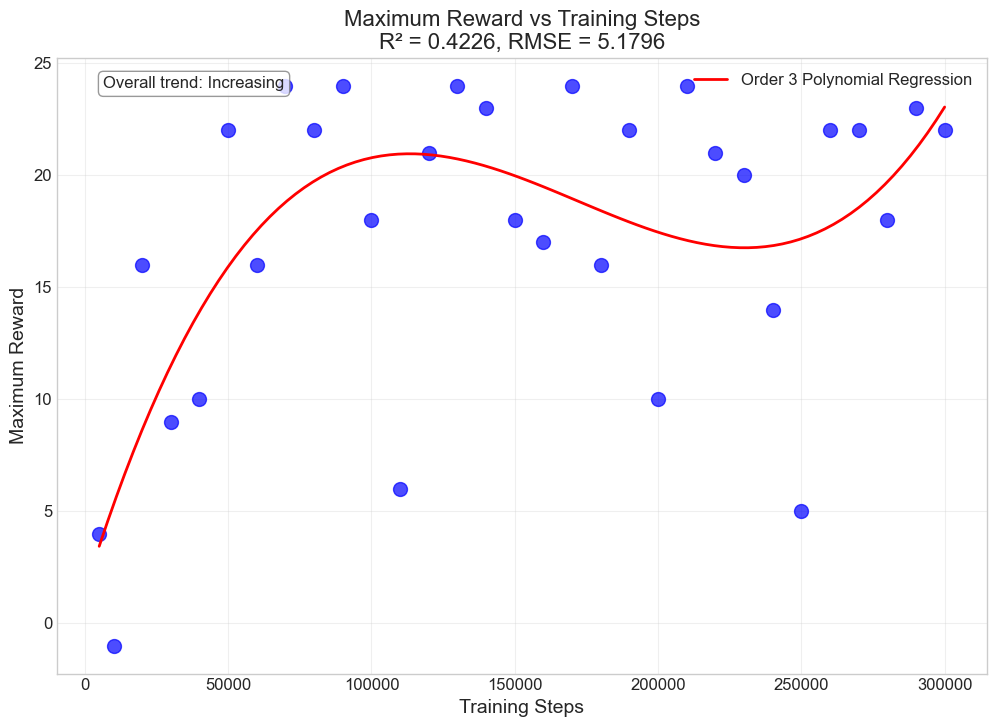

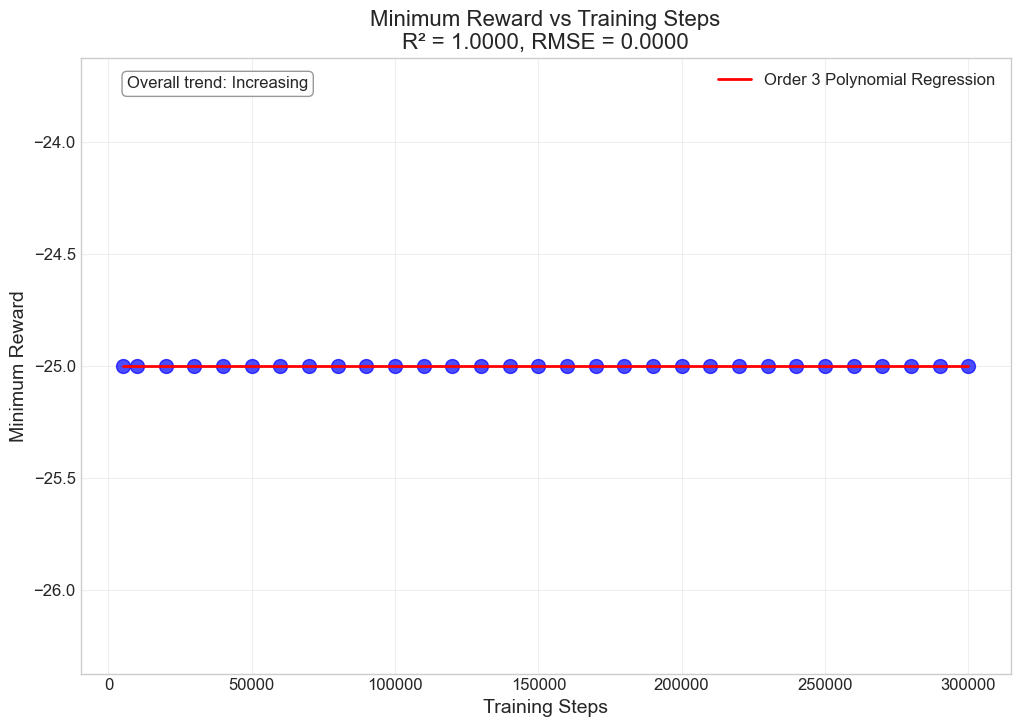

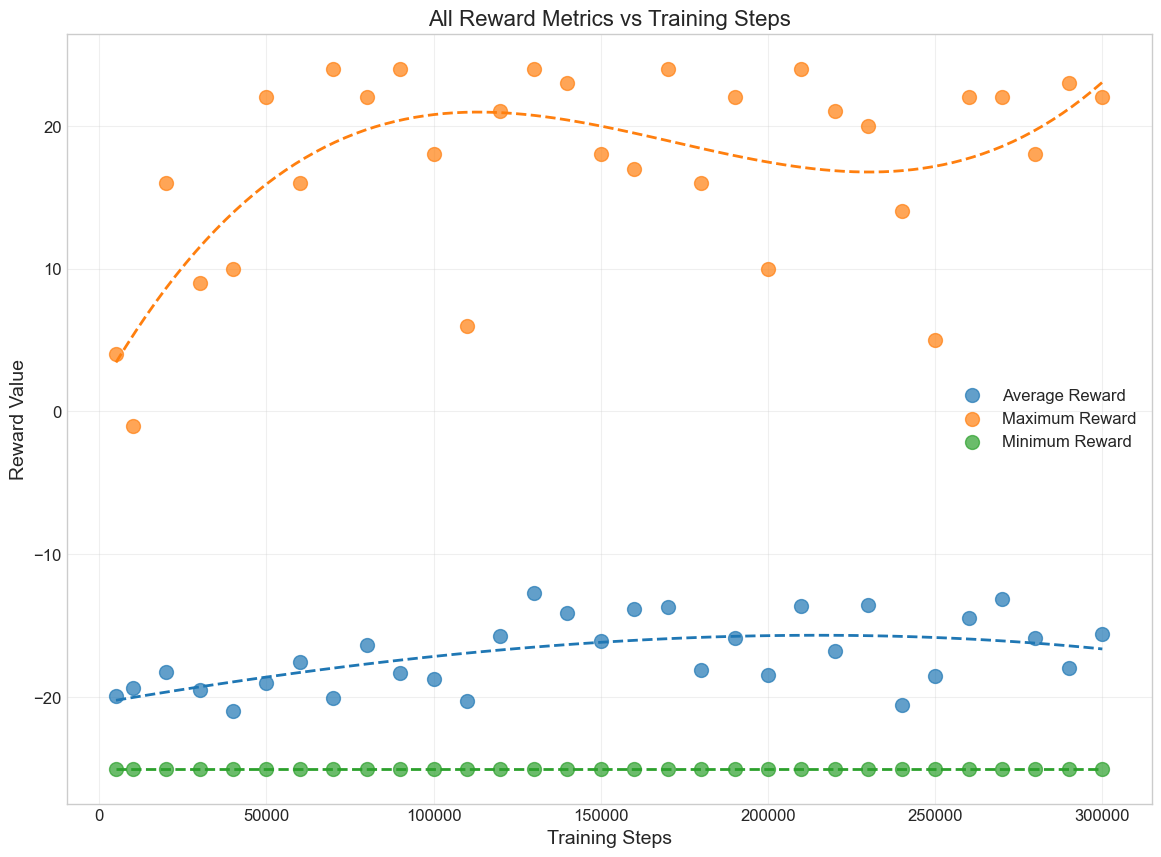


Training Effect Analysis:
1. The overall trend of Average Reward with training steps is: Increasing
2. The overall trend of Maximum Reward with training steps is: Increasing
3. The overall trend of Minimum Reward with training steps is: Increasing

Model Performance Analysis:
1. Model with highest average reward: pig_chase-dqn_fast_130000.model, Steps: 130000, Avg Reward: -12.72
2. Model with highest maximum reward: pig_chase-dqn_fast_70000.model, Steps: 70000, Max Reward: 24.0

Based on 3rd order polynomial regression analysis, the theoretical optimal number of training steps is: 214954
Predicted average reward at this step count: -15.6679

Actual model closest to theoretical optimal step count: pig_chase-dqn_fast_210000.model
Average reward of this model: -13.6
Difference from theoretical optimal value: -2.0679


In [45]:

# 1. Average reward vs steps
plt_avg = plot_regression('Steps', 'Avg_Reward', 'Average Reward vs Training Steps', 'Training Steps', 'Average Reward', order=3)
plt_avg.savefig('avg_reward_vs_steps.png', dpi=300, bbox_inches='tight')
plt_avg.show()

# 2. Maximum reward vs steps
plt_max = plot_regression('Steps', 'Max_Reward', 'Maximum Reward vs Training Steps', 'Training Steps', 'Maximum Reward', order=3)
plt_max.savefig('max_reward_vs_steps.png', dpi=300, bbox_inches='tight')
plt_max.show()

# 3. Minimum reward vs steps
plt_min = plot_regression('Steps', 'Min_Reward', 'Minimum Reward vs Training Steps', 'Training Steps', 'Minimum Reward', order=3)
plt_min.savefig('min_reward_vs_steps.png', dpi=300, bbox_inches='tight')
plt_min.show()

## Combined plot - All metrics vs steps
plt.figure(figsize=(14, 10))

# Adjust colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.scatter(df['Steps'], df['Avg_Reward'], s=100, color=colors[0], alpha=0.7, label='Average Reward')
plt.scatter(df['Steps'], df['Max_Reward'], s=100, color=colors[1], alpha=0.7, label='Maximum Reward')
plt.scatter(df['Steps'], df['Min_Reward'], s=100, color=colors[2], alpha=0.7, label='Minimum Reward')

# Perform regression for each metric
X = df['Steps'].values.reshape(-1, 1)
X_seq = np.linspace(df['Steps'].min(), df['Steps'].max(), 100).reshape(-1, 1)

for i, metric in enumerate(['Avg_Reward', 'Max_Reward', 'Min_Reward']):
    y_data = df[metric].values
    
    # Create polynomial features (using 3rd order polynomial)
    polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X, y_data)
    
    # Predict
    y_pred = pipeline.predict(X_seq)
    
    # Plot regression line
    plt.plot(X_seq, y_pred, color=colors[i], linewidth=2, linestyle='--')

plt.title('All Reward Metrics vs Training Steps', fontsize=16)
plt.xlabel('Training Steps', fontsize=14)
plt.ylabel('Reward Value', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('all_metrics_vs_steps.png', dpi=300, bbox_inches='tight')
plt.show()


## Analysis and Conclusions

# Calculate overall trends (linear regression slope)
trends = {}
for metric in ['Avg_Reward', 'Max_Reward', 'Min_Reward']:
    slope = np.polyfit(df['Steps'], df[metric], 1)[0]
    trends[metric] = "Increasing" if slope > 0 else "Decreasing"

print("\nTraining Effect Analysis:")
print(f"1. The overall trend of Average Reward with training steps is: {trends['Avg_Reward']}")
print(f"2. The overall trend of Maximum Reward with training steps is: {trends['Max_Reward']}")
print(f"3. The overall trend of Minimum Reward with training steps is: {trends['Min_Reward']}")

# Find the best performing models
best_avg_model = df.loc[df['Avg_Reward'].idxmax()]
best_max_model = df.loc[df['Max_Reward'].idxmax()]

print("\nModel Performance Analysis:")
print(f"1. Model with highest average reward: {best_avg_model['Model']}, Steps: {best_avg_model['Steps']}, Avg Reward: {best_avg_model['Avg_Reward']}")
print(f"2. Model with highest maximum reward: {best_max_model['Model']}, Steps: {best_max_model['Steps']}, Max Reward: {best_max_model['Max_Reward']}")

# Calculate polynomial regression for average reward to find the theoretical optimal point
X = df['Steps'].values.reshape(-1, 1)
y = df['Avg_Reward'].values

# Use 3rd order polynomial
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression = LinearRegression()
pipeline = make_pipeline(polynomial_features, linear_regression)
pipeline.fit(X, y)

# Predict on a denser grid to find the theoretical optimal number of steps
dense_X = np.linspace(df['Steps'].min(), df['Steps'].max(), 1000).reshape(-1, 1)
predicted_rewards = pipeline.predict(dense_X)
optimal_idx = np.argmax(predicted_rewards)
optimal_steps = dense_X[optimal_idx][0]

print(f"\nBased on 3rd order polynomial regression analysis, the theoretical optimal number of training steps is: {int(optimal_steps)}")
print(f"Predicted average reward at this step count: {predicted_rewards[optimal_idx]:.4f}")

# Compare actual performance with theoretical optimal value
closest_model_idx = np.abs(df['Steps'] - optimal_steps).argmin()
closest_model = df.iloc[closest_model_idx]

print(f"\nActual model closest to theoretical optimal step count: {closest_model['Model']}")
print(f"Average reward of this model: {closest_model['Avg_Reward']}")
print(f"Difference from theoretical optimal value: {predicted_rewards[optimal_idx] - closest_model['Avg_Reward']:.4f}")
